# 1. Merge Query Batches

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)
pd.set_option('display.max_colwidth', 5000)

In [2]:
abs_path = '../data/gui_ranking/mturk/goldstandard_batch_1/02_query_results/'

batch_1 = pd.read_csv(abs_path+"batch_results_1.csv")
batch_2 = pd.read_csv(abs_path+"batch_results_2.csv")
batch_3 = pd.read_csv(abs_path+"batch_results_3.csv")
batch_4 = pd.read_csv(abs_path+"batch_results_4.csv")

batches = pd.concat([batch_1, batch_2, batch_3, batch_4])

In [ ]:
batch = batches[['WorkerId', 'Answer.summary', 'Input.gui_index']].copy()
batch = batch.rename(columns={"Answer.summary": "query", "Input.gui_index": "gui_index"})

# 2. Preprocess Queries

In [5]:
def dequote(s):
    """
    If a string has single or double quotes around it, remove them.
    Make sure the pair of quotes match.
    If a matching pair of quotes is not found, return the string unchanged.
    """
    if (s[0] == s[-1]) and s.startswith(("'", '"')):
        return s[1:-1]
    return s

def strip_special_chars(s):
    import re
    s = re.sub(r"^\W+", "", s)
    s = re.sub(r"\W+$", "", s)
    return s

def preprocess(s):
    s = s.strip()
    s = strip_special_chars(s)
    s = s.strip()
    return s

In [6]:
# Preprocess the queries
batch["query"] = batch.apply(lambda row: (preprocess(row["query"])), axis=1)

# 3. Filter Queries

In [8]:
print("Size before filtering: {}".format(len(batch)))
print("Unique workers: {}".format(len(set([elem[0] for elem in batch[["WorkerId"]].values.tolist()]))))

Size before filtering: 1045
Unique workers: 56


In [9]:
# WorkerIds that should be filtered since they systematically made errors
worker_ids = ["A11LV5AT27LBFI", "A373WQWN0DADNL", "A1966JFRA8OWUW", "A5YAOZYSJBF5J", "A3KECU88OW1KNB", "A3AFAUMZ4AULZF"]

In [10]:
# Filter batches from bad workers
filtered_batch = batch.loc[~batch['WorkerId'].isin(worker_ids)].copy()

In [11]:
# Filter single GUIs that are obvisouly errorneous or unusable from Rico (e.g. blank or black screen)
gui_ids_to_filter = [62645, 51144, 48115, 5573, 30665, 65339]

In [12]:
# Filter batches from bad GUIs
filtered_batch = filtered_batch.loc[~filtered_batch['gui_index'].isin(gui_ids_to_filter)].copy()

In [13]:
print("Size after filtering: {}".format(len(filtered_batch)))
print("Unique workers after filtering: {}".format(len(set([elem[0] for elem in filtered_batch[["WorkerId"]].values.tolist()]))))

Size after filtering: 931
Unique workers after filtering: 50


# 4. Gold Standard Queries

In [14]:
# Select random sample from filtered queries data
goldstandard_size_n = 150
goldstandard_random_state = 537
goldstandard_sample = filtered_batch.sample(n=goldstandard_size_n, random_state=goldstandard_random_state)

In [15]:
print("Goldstandard size: {}".format(len(goldstandard_sample)))
print("Number of unique workers: {}".format(len(goldstandard_sample["WorkerId"].unique())))
goldstandard_sample

Goldstandard size: 150
Number of unique workers: 44


,WorkerId,query,gui_index
386,A1R6ELRI4GR9XF,web brower with list,16227
219,A1NW9UWTFS14S5,Tabs layout preview,22974
34,A2KNN0T650FQ01,healthcare pulse app,25921
266,A2KNN0T650FQ01,contact details form,48069
57,A26BOJ0O91EIBR,Navigation app with setting location and destination,52332
190,A1FV1XP2UU0EVH,trending page,59599
384,A13HTFAO25P3U4,Sidebar with homepage and other options,69790
149,AVRMXTZHUCXXL,Spanish news with figuers and search option,58638
192,A1R6ELRI4GR9XF,side panel with share and settings,64805
101,A11B0Q26E3U79M,Setting screen of a time planer,48465


In [16]:
# Save goldstandard queries to csv files
abs_path_save =  '../goldstandard_batch_1/03_query_sampled/'
goldstandard_sample[["query"]].to_csv(abs_path_save+"goldstandard_q.csv", index_label="id")
goldstandard_sample[["query", "WorkerId"]].to_csv(abs_path_save+"goldstandard_qw.csv", index_label="id")
goldstandard_sample[["query", "gui_index"]].to_csv(abs_path_save+"goldstandard_qg.csv", index_label="id")
goldstandard_sample[["query", "gui_index", "WorkerId"]].to_csv(abs_path_save+"goldstandard_qgw.csv", index_label="id")

# 5. Load and Pool Top-30 GUIs from Baseline Rankers

### 5.1 Compute Pooling Metrics

In [18]:
# We generated the top-30 guis with different methods and perform pooling to get initial set of guis to be annotated
abs_path = '../data/gui_ranking/mturk/goldstandard_batch_1/04_baseline_rankings/'

from ast import literal_eval

rankings_bm25 = pd.read_csv(abs_path+"/bm25okapi/rankings_bm25okapi.csv")
rankings_bm25['ranked_guis'] = rankings_bm25['ranked_guis'].apply(literal_eval)

rankings_tfidf = pd.read_csv(abs_path+"/tfidf-retrieval/rankings_tfidf-retrieval.csv")
rankings_tfidf['ranked_guis'] = rankings_tfidf['ranked_guis'].apply(literal_eval)

rankings_iwcs = pd.read_csv(abs_path+"/nbow/rankings_nbow.csv")
rankings_iwcs['ranked_guis'] = rankings_iwcs['ranked_guis'].apply(literal_eval)

In [19]:
rankings_goldstandard = pd.DataFrame()
rankings_goldstandard = rankings_goldstandard.append(rankings_bm25[["id", "query", "ranked_guis"]])
rankings_goldstandard = rankings_goldstandard.rename({"ranked_guis": "rankings_1"}, axis=1)
rankings_goldstandard["rankings_2"] = rankings_tfidf[["ranked_guis"]]
rankings_goldstandard["rankings_3"] = rankings_iwcs[["ranked_guis"]]

In [21]:
def pool_all(rankings_1, rankings_2, rankings_3):
    rankings = rankings_1.copy()
    rankings.extend(rankings_2)
    rankings.extend(rankings_3)
    return list(set(rankings))

def pairwise_overlap_ratio(rankings_1, rankings_2):
    ranks_1 = rankings_1.copy()
    ranks_2 = rankings_2.copy()
    return 1 - len(set(ranks_1 + ranks_2))/ len(ranks_1 + ranks_2)

def all_overlap_ratio(rankings_1, rankings_2, rankings_3):
    ranks_1 = rankings_1.copy()
    ranks_2 = rankings_2.copy()
    ranks_3 = rankings_3.copy()
    return 1 - (len(set(ranks_1 + ranks_2 + ranks_3))/ len(ranks_1 + ranks_2 + ranks_3))

In [22]:
rankings_goldstandard["merged_rankings"] = rankings_goldstandard.apply(lambda row: pool_all(row["rankings_1"], row["rankings_2"], row["rankings_3"]), axis=1)
rankings_goldstandard["size_1"] = rankings_goldstandard.apply(lambda row: len(row["rankings_1"]), axis=1)
rankings_goldstandard["size_2"] = rankings_goldstandard.apply(lambda row: len(row["rankings_2"]), axis=1)
rankings_goldstandard["size_3"] = rankings_goldstandard.apply(lambda row: len(row["rankings_3"]), axis=1)
rankings_goldstandard["size_pooled"] = rankings_goldstandard.apply(lambda row: len(row["merged_rankings"]), axis=1)
rankings_goldstandard["olr_1_2"] = rankings_goldstandard.apply(lambda row: pairwise_overlap_ratio(row["rankings_1"], row["rankings_2"]), axis=1)
rankings_goldstandard["olr_1_3"] = rankings_goldstandard.apply(lambda row: pairwise_overlap_ratio(row["rankings_1"], row["rankings_3"]), axis=1)
rankings_goldstandard["olr_2_3"] = rankings_goldstandard.apply(lambda row: pairwise_overlap_ratio(row["rankings_2"], row["rankings_3"]), axis=1)
rankings_goldstandard["olr_all"] = rankings_goldstandard.apply(lambda row: all_overlap_ratio(row["rankings_1"], row["rankings_2"], row["rankings_3"]), axis=1)

### 5.2 Pooled Top-30 GUIs from Baseline Models

In [24]:
def pool_top_results(row, pool_size=30, shuffle_pool=True, shuffle_seed=471):
    pool = []
    rankings_1 = row['rankings_1'].copy()
    rankings_2 = row['rankings_2'].copy()
    rankings_3 = row['rankings_3'].copy()
    all_rankings = [rankings_1, rankings_2, rankings_3]
    # First add the GUI to the pool that we showed the worker to initially write the query
    gui_shown_to_write_query = rankings_1[len(rankings_1)-1]
    pool.append(gui_shown_to_write_query)
    pool_counter = 0
    while len(pool) < pool_size:
        curr_ranking = all_rankings[pool_counter%3]
        if curr_ranking:
            curr_elem = curr_ranking.pop(0)
            while curr_elem in pool and curr_ranking:
                curr_elem = curr_ranking.pop(0)
            pool.append(curr_elem)
        pool_counter+=1
    if shuffle_pool:
        random.Random(shuffle_seed).shuffle(pool)
    return pool

In [25]:
import random

SHUFFLE_POOLED_RANKINGS = False
SHUFFLE_SEED = 471

rankings_goldstandard["pooled_rankings"] = rankings_goldstandard.apply(lambda row: pool_top_results(row, shuffle_pool=SHUFFLE_POOLED_RANKINGS), axis=1)

In [27]:
rankings_goldstandard.to_csv(abs_path+"pooled_rankings.csv")

### 5.3 Split Into Two Dataframes for MTurk

In [28]:
rankings_goldstandard_minified = rankings_goldstandard[["id", "query", "pooled_rankings"]].copy()

In [30]:
rankings_goldstandard_minified_1 = rankings_goldstandard_minified.copy()
rankings_goldstandard_minified_1["pooled_rankings"] = rankings_goldstandard_minified_1.apply(lambda row: row["pooled_rankings"][:int(len(row["pooled_rankings"])/2)], axis=1)
rankings_goldstandard_minified_2 = rankings_goldstandard_minified.copy()
rankings_goldstandard_minified_2["pooled_rankings"] = rankings_goldstandard_minified_2.apply(lambda row: row["pooled_rankings"][int(len(row["pooled_rankings"])/2):], axis=1)

In [ ]:
f = lambda x: 'gui_index_{}'.format(x + 1)
rankings_goldstandard_minified_1_mturk = pd.concat([rankings_goldstandard_minified_1["id"], rankings_goldstandard_minified_1["query"], pd.DataFrame(rankings_goldstandard_minified_1["pooled_rankings"].values.tolist()).rename(columns=f)], axis=1)

In [ ]:
rankings_goldstandard_minified_2_mturk = pd.concat([rankings_goldstandard_minified_2["id"], rankings_goldstandard_minified_2["query"], pd.DataFrame(rankings_goldstandard_minified_2["pooled_rankings"].values.tolist()).rename(columns=f)], axis=1)

In [33]:
abs_path = '../data/gui_ranking/mturk/goldstandard_batch_1/04_baseline_rankings/pooling/'

rankings_goldstandard.to_csv(abs_path+"pooled_rankings.csv", index=False)
# Save the pooled GUIs to CSV in the format that MTurk expects
rankings_goldstandard_minified_1_mturk.to_csv(abs_path+"pooled_rankings_for_mturk_1.csv", index=False)
rankings_goldstandard_minified_2_mturk.to_csv(abs_path+"pooled_rankings_for_mturk_2.csv", index=False)

# 6. Gold Standard Relevance Annotations

In [34]:
# Load annotations from MTurk
abs_path = '../data/gui_ranking/mturk/goldstandard_batch_1/05_relevance_annotations/'

annotations_1 = pd.read_csv(abs_path+"/annotations_1.csv")
annotations_2 = pd.read_csv(abs_path+"/annotations_2.csv")

### 6.1 Preprocess

In [36]:
def annotations_to_list(row):
    annotations = []
    for i in range(1,16):
        prefix = 'Answer.gui_' + str(i)
        annotations.append([j for j in range(0,3) if row[prefix+"."+str(j)]][0])
    return annotations

def guis_indexes_to_list(row):
    gui_indexes = []
    for i in range(1,16):
        prefix = 'Input.gui_index_' + str(i)
        gui_indexes.append(row[prefix])
    return gui_indexes

In [37]:
def preprocess_annotations(dataframe):
    dataframe["annotations_list"] = dataframe.apply(lambda row: annotations_to_list(row), axis=1)
    dataframe["gui_indexes_list"] = dataframe.apply(lambda row: guis_indexes_to_list(row), axis=1)
    return dataframe

In [38]:
annotations_1 = preprocess_annotations(annotations_1)
annotations_2 = preprocess_annotations(annotations_2)

### 6.2 Compute Majority Vote

In [40]:
from collections import Counter

def majority_vote_gui(votes):
    vote_count = Counter(votes)
    top_vote = vote_count.most_common(1)
    if top_vote[0][1] == 1:
        # We have a tie between the three options so we mark it with 3
        return 3
    return top_vote[0][0]

def majority_vote_hit(annotations):
    zipped = list(zip(*annotations))
    all_mvs = [majority_vote_gui(list(elem)) for elem in zipped]
    return all_mvs

In [ ]:
annotations_minified_1 = annotations_1[["Input.query", "Input.id", "annotations_list", "gui_indexes_list", "WorkerId"]]

In [ ]:
annotations_minified_2 = annotations_2[["Input.query", "Input.id", "annotations_list", "gui_indexes_list", "WorkerId"]]

In [44]:
def majority_votes_dataframe(dataframe):
    majority_votes = dataframe.copy()[["Input.id", "Input.query", "annotations_list", "gui_indexes_list"]].groupby(['Input.id', 'Input.query']).agg({
                                                                                                            "annotations_list": lambda x: majority_vote_hit(x.tolist()),
                                                                                                            "gui_indexes_list": lambda x: list(x)[0]})
    majority_votes = majority_votes.reset_index()
    majority_votes = majority_votes.rename({"Input.id": "id",
                                      "Input.query": "query",
                                      "annotations_list": "relevance",
                                      "gui_indexes_list": "gui_indexes"}, axis=1)
    return majority_votes

In [45]:
majority_votes_1 = majority_votes_dataframe(annotations_1)
majority_votes_2 = majority_votes_dataframe(annotations_2)

### 6.3  Compare Woker Annotations to Majority Vote

In [48]:
def annotations_with_majority_vote(annotations, majority_votes):
    annotations_with_mv = annotations[["Input.query", "Input.id", "annotations_list", "gui_indexes_list", "WorkerId"]].set_index(['Input.id', 'Input.query']).join(majority_votes.set_index(['id', 'query']))
    annotations_with_mv = annotations_with_mv.reset_index()
    return annotations_with_mv  

In [49]:
def annotations_with_majority_vote(annotations, majority_votes):
    annotations_int = annotations.copy()
    annotations_int = annotations_int.rename({"Input.id": "id", "Input.query": "query"}, axis=1)
    annotations_with_mv = annotations_int[["id", "query", "annotations_list", "gui_indexes_list", "WorkerId"]].set_index(['id', 'query']).join(majority_votes.set_index(['id', 'query']))
    annotations_with_mv = annotations_with_mv.reset_index()
    return annotations_with_mv  

In [50]:
annotations_with_mv_1 = annotations_with_majority_vote(annotations_minified_1, majority_votes_1)
annotations_with_mv_2 = annotations_with_majority_vote(annotations_minified_2, majority_votes_2)

In [51]:
def agreement_to_mv(vote_worker, vote_majority):
    if len(vote_worker) != len(vote_majority):
        raise ValueError("Worker vote {} length unequal to majority vote {} length".format(len(vote_worker), len(vote_majority)))
    count_uneq_votes = 0
    for index, vote_m in enumerate(vote_majority):
        if not (vote_m == 3) and (vote_m) != vote_worker[index]:
            count_uneq_votes+=1
    return (len(vote_majority) - count_uneq_votes) / len(vote_majority)

In [52]:
def create_approvement_dataframe(dataframe, approve_margin):
    dataframe["mv_agreement"] = dataframe.apply(lambda row: agreement_to_mv(row["annotations_list"], row["relevance"]), axis=1)
    dataframe["state"] = dataframe.apply(lambda row: "accept" if row["mv_agreement"]>=APPROVE_MARGIN else "reject", axis=1)
    return dataframe

In [53]:
APPROVE_MARGIN = (10/15)
print("Approve margin : {}".format(APPROVE_MARGIN))
annotations_with_mv_1 = create_approvement_dataframe(annotations_with_mv_1, APPROVE_MARGIN)
annotations_with_mv_2 = create_approvement_dataframe(annotations_with_mv_2, APPROVE_MARGIN)

Approve margin : 0.6666666666666666


In [55]:
def create_final_approvement_dataframe(annotations_with_mv, annotations):
    annotations_with_mv_minified = annotations_with_mv[["id", "query", "WorkerId", "state", "mv_agreement"]]
    mturk_annotations = annotations.copy()
    mturk_annotations = mturk_annotations.drop(columns=['annotations_list', "gui_indexes_list"])
    # Merge original MTurk annotations dataframe with the approvement dataframe
    merged = pd.merge(mturk_annotations, annotations_with_mv_minified, left_on=["Input.id", "Input.query", "WorkerId"], right_on=["id", "query", "WorkerId"])
    # Fill the approve and reject cols according to the state cols
    merged["Approve"] = merged.apply(lambda row: "x" if row["state"] == "accept" else "", axis=1)
    merged["Reject"] = merged.apply(lambda row: ("You only matched {}% of the majority vote".format(row["mv_agreement"]*100)) if row["state"] == "reject" else "", axis=1)
    merged = merged.drop(columns=['mv_agreement', 'state', 'id', 'query'])
    return merged

In [56]:
merged_1 = create_final_approvement_dataframe(annotations_with_mv_1, annotations_1)
merged_2 = create_final_approvement_dataframe(annotations_with_mv_2, annotations_2)

In [58]:
abs_path_save = '../goldstandard_batch_1/05_relevance_annotations/'
merged_1.to_csv(abs_path_save+"annotations_1_approval.csv", index=False)
merged_2.to_csv(abs_path_save+"annotations_2_approval.csv", index=False)

## 6.4.1 Relevance Level Distributions

In [59]:
majority_votes_1 = majority_votes_1.reset_index()
majority_votes_2 = majority_votes_2.reset_index()
merged_majority_votes = majority_votes_1.copy().append(majority_votes_2)

In [ ]:
merged_majority_votes = merged_majority_votes.copy().groupby(['id', 'query']).agg({
                                                                          "relevance": lambda x: list(x)[0] + list(x)[1],
                                                                          "gui_indexes": lambda x: list(x)[0] + list(x)[1]})
merged_majority_votes = merged_majority_votes.reset_index()

In [62]:
mv_analysis = merged_majority_votes.copy()
mv_analysis["count_0"] = mv_analysis.apply(lambda row: row['relevance'].count(0), axis=1)
mv_analysis["count_1"] = mv_analysis.apply(lambda row: row['relevance'].count(1), axis=1)
mv_analysis["count_2"] = mv_analysis.apply(lambda row: row['relevance'].count(2), axis=1)
mv_analysis["count_3"] = mv_analysis.apply(lambda row: row['relevance'].count(3), axis=1)

In [64]:
print("Mean num. of 0: {}".format(np.mean(mv_analysis['count_0'].values.tolist())))
print("Mean num. of 1: {}".format(np.mean(mv_analysis['count_1'].values.tolist())))
print("Mean num. of 2: {}".format(np.mean(mv_analysis['count_2'].values.tolist())))
print("Mean num. of 3: {}".format(np.mean(mv_analysis['count_3'].values.tolist())))

Mean num. of 0: 15.766666666666667
Mean num. of 1: 5.42
Mean num. of 2: 5.98
Mean num. of 3: 2.8333333333333335


In [65]:
sum_0 = np.sum(mv_analysis['count_0'].values.tolist())
sum_1 = np.sum(mv_analysis['count_1'].values.tolist())
sum_2 = np.sum(mv_analysis['count_2'].values.tolist())
sum_3 = np.sum(mv_analysis['count_3'].values.tolist())
sum_all = sum_0 + sum_1 + sum_2 + sum_3

print("Sum num. of 0: {}, perc. : {}".format(sum_0, (sum_0/sum_all)))
print("Sum num. of 1: {}, perc. : {}".format(sum_1, (sum_1/sum_all)))
print("Sum num. of 2: {}, perc. : {}".format(sum_2, (sum_2/sum_all)))
print("Sum num. of 3: {}, perc. : {}".format(sum_3, (sum_3/sum_all)))
print("Sum num. of all: {}".format(sum_all))

Sum num. of 0: 2365, perc. : 0.5255555555555556
Sum num. of 1: 813, perc. : 0.18066666666666667
Sum num. of 2: 897, perc. : 0.19933333333333333
Sum num. of 3: 425, perc. : 0.09444444444444444
Sum num. of all: 4500


<AxesSubplot:ylabel='Frequency'>

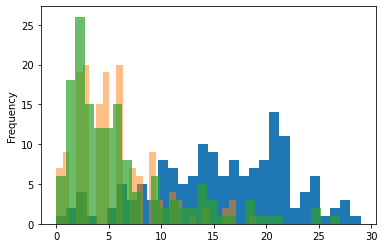

In [66]:
mv_analysis['count_0'].plot.hist(bins=30)
mv_analysis['count_1'].plot.hist(bins=30, alpha=0.5)
mv_analysis['count_2'].plot.hist(bins=30, alpha=0.7)

In [70]:
mv_analysis['count@1'] = mv_analysis.apply(lambda row: row['relevance'][0], axis=1)

In [71]:
count_at_1 = [elem[0] for elem in mv_analysis[['count@1']].values.tolist()]
num_queries = len(count_at_1)
print('Number of queries: {}'.format(num_queries))
print('Perc. of 2: {}'.format((count_at_1.count(2)/num_queries)))
print('Perc. of 1: {}'.format((count_at_1.count(1)/num_queries)))
print('Perc. of 2+1: {}'.format((count_at_1.count(2)/num_queries)+(count_at_1.count(1)/num_queries)))
print('Perc. of 0: {}'.format((count_at_1.count(0)/num_queries)))
print('Perc. of 3: {}'.format((count_at_1.count(3)/num_queries)))

Number of queries: 150
Perc. of 2: 0.7
Perc. of 1: 0.07333333333333333
Perc. of 2+1: 0.7733333333333333
Perc. of 0: 0.14
Perc. of 3: 0.08666666666666667


### 6.5 Compute Occurances for Inter-Annotator Agreement

In [93]:
annotations_minified_1_ = annotations_minified_1.copy()
annotations_minified_2_ = annotations_minified_2.copy()
# Compute for each dataframe the group id and the cumcount to be able to join them into a single dataframe
annotations_minified_1_['groupid'] = annotations_minified_1_.groupby(['Input.query', 'Input.id']).ngroup()
annotations_minified_1_['cumcount'] = annotations_minified_1_.groupby(['Input.query', 'Input.id']).cumcount()

annotations_minified_2_['groupid'] = annotations_minified_2_.groupby(['Input.query', 'Input.id']).ngroup()
annotations_minified_2_['cumcount'] = annotations_minified_2_.groupby(['Input.query', 'Input.id']).cumcount()

In [ ]:
merged_annotations_minified = annotations_minified_1_.copy().append(annotations_minified_2_)

In [98]:
# Save all the annotations of individual workers
abs_path_save = '../goldstandard_batch_1/06_final_dataset/'
merged_annotations_minified.to_csv(abs_path_save+'goldstandard_batch_1_full.csv', index=False)

In [ ]:
merged_annotations_minified = merged_annotations_minified.copy().groupby(['groupid', 'cumcount']).agg({"Input.query": lambda x: list(x)[0],
                                                                                "Input.id": lambda x: list(x)[0],
                                                                          "annotations_list": lambda x: list(x)[0] + list(x)[1],
                                                                          "gui_indexes_list": lambda x: list(x)[0] + list(x)[1]})
merged_annotations_minified = merged_annotations_minified.reset_index()

In [ ]:
annotations_for_agreement = merged_annotations_minified[["Input.id", "Input.query", "annotations_list", "gui_indexes_list"]].copy()

In [78]:
def compute_occurance_matrix(annotations):
    alls = []
    for gui_anno in annotations:
        counts = {0:0, 1:0, 2:0}
        for elem in gui_anno:
            counts[elem]+=1
        alls.append([counts[0], counts[1], counts[2]])
    return alls

def compute_occurance_zip(annotations):
    return list(zip(*annotations))

In [ ]:
relevances = merged_majority_votes[["id", "query", "relevance"]].rename(columns={"id": "Input.id", 'query':'Input.query'})

In [ ]:
agreement_counts = annotations_for_agreement.groupby(['Input.id', 'Input.query']).agg({"annotations_list": lambda x: compute_occurance_zip(x.tolist()),
                                                                       "gui_indexes_list": lambda x: list(x)[0]})
agreement_counts = agreement_counts.reset_index()
agreement_counts_mv = pd.merge(agreement_counts, relevances, left_on=["Input.id", 'Input.query'], right_on=["Input.id", 'Input.query'])

In [ ]:
agreement_counts_mv["occurances"] = agreement_counts_mv.apply(lambda row: compute_occurance_matrix(row["annotations_list"]), axis=1)

In [ ]:
# Save the final gold standard with relevance annotations
abs_path_save = '../data/gui_ranking/mturk/goldstandard_batch_1/06_final_dataset/'
agreement_counts_mv.to_csv(abs_path_save+'goldstandard_batch_1.csv', index=False)